In [1]:
import os
import json
import matplotlib.pyplot as plt

# Directory containing the JSON files
json_parent_directory = [
    '/data/home/yuewu96/reward-bench/results/fsx-project/yuewu96/bt_reward_model/checkpoints',
    '/data/home/yuewu96/reward-bench/results//fsx-project/yuewu96/low_rank_llama/checkpoints'
]
json_directory_list = []

for directory_path in json_parent_directory:
    all_entries = os.listdir(directory_path)
    folders = [os.path.join(directory_path, entry) for entry in all_entries if os.path.isdir(os.path.join(directory_path, entry))]

    # print(folders)
    json_directory_list.extend(folders)

[print(_) for _ in json_directory_list]


['/data/home/yuewu96/reward-bench/results/fsx-project/yuewu96/bt_reward_model/checkpoints/llama3_bt_reward_full_lr_2e-7', '/data/home/yuewu96/reward-bench/results/fsx-project/yuewu96/bt_reward_model/checkpoints/llama3_bt_reward_full_lr_6e-7', '/data/home/yuewu96/reward-bench/results/fsx-project/yuewu96/bt_reward_model/checkpoints/llama3_bt_reward_full_lr_2e-6', '/data/home/yuewu96/reward-bench/results//fsx-project/yuewu96/low_rank_llama/checkpoints/llama3_low_rank_full_lr_6e-7', '/data/home/yuewu96/reward-bench/results//fsx-project/yuewu96/low_rank_llama/checkpoints/llama3_low_rank_full_lr_2e-7', '/data/home/yuewu96/reward-bench/results//fsx-project/yuewu96/low_rank_llama/checkpoints/llama3_low_rank_full_lr_2e-6']


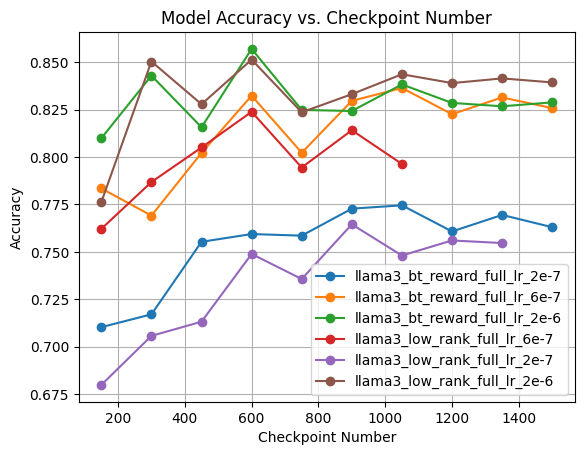

In [3]:

for json_directory in json_directory_list:
    # Initialize a dictionary to store accuracy and checkpoint number
    checkpoint_accuracies = {}
    run_name = json_directory.split('/')[-1]
    # Loop through all files in the directory
    for root, dirs, files in os.walk(json_directory):
        for file in files:
            if file.endswith('.json'):
                json_path = os.path.join(root, file)
                
                # Extract checkpoint number from the filename
                checkpoint_number = int(file.split('-')[-1].split('.')[0])
                
                # Read the JSON file
                with open(json_path, 'r') as f:
                    data = json.load(f)
                    
                    # Extract accuracy
                    accuracy = data.get('section_results_mean', None)
                    
                    # Store in dictionary
                    if accuracy is not None:
                        checkpoint_accuracies[checkpoint_number] = accuracy

    # Sort the checkpoint numbers
    sorted_checkpoints = sorted(checkpoint_accuracies.keys())
    sorted_accuracies = [checkpoint_accuracies[ckpt] for ckpt in sorted_checkpoints]
    plt.plot(sorted_checkpoints, sorted_accuracies, marker='o', linestyle='-', label=run_name)




# Plotting the results
# plt.figure(figsize=(10, 6))
plt.xlabel('Checkpoint Number')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy vs. Checkpoint Number')
plt.grid(True)
plt.show()
